In [23]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
from glob import glob

In [24]:
layers = ['layer1_3x64',
          'layer2_64x64',
          'layer3_64x128',
          'layer4_128x128',
          'layer5_128x256',
          'layer6_256x256',
          'layer7_256x256',
          'layer8_256x512',
          'layer9_512x512',
          'layer10_512x512',
          'layer11_512x512',
          'layer12_512x512',
          'layer13_512x512']

In [25]:
csvs = {}
csv_root = 'csv_new2'
for layer in layers:
    csvs[layer] = pd.read_csv(os.path.join(csv_root,layer + '.csv'))

In [26]:
methods = csvs[layers[0]].columns.tolist()

In [27]:
avg = {x:{} for x in layers}
for layer in layers:
    for method in methods:
        avg[layer][method] = csvs[layer][method].mean()

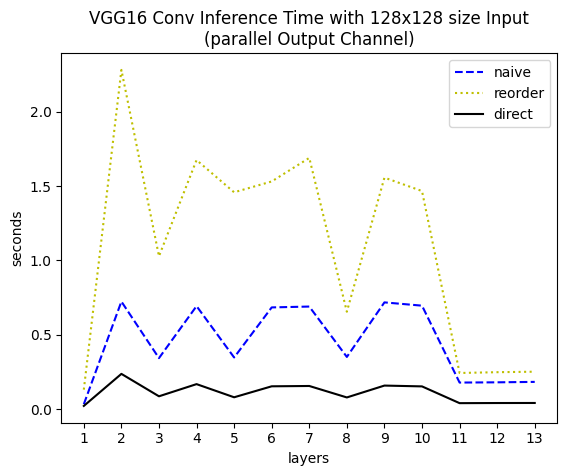

In [28]:
color = ['b--','y:','k']

for i, method in enumerate(methods):
    x = [x for x in range(1,14)]
    y = []
    for layer in layers:
        y.append(avg[layer][method])
    plt.plot(x,y,color[i],label=method)
    plt.xticks(x)
plt.title('VGG16 Conv Inference Time with 128x128 size Input\n(parallel Output Channel)')
plt.xlabel('layers')
plt.ylabel('seconds')
plt.legend()
plt.grid()
plt.savefig("Intel_CPU_Parallel_Out_Chn.png")

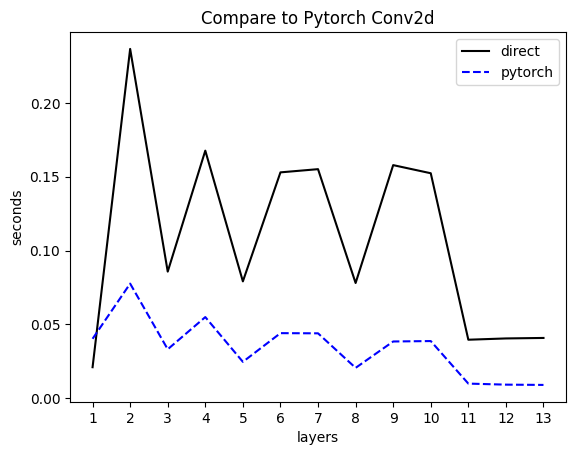

In [29]:
x = [x for x in range(1,14)]
y = []
for layer in layers:
    y.append(avg[layer]['direct'])
plt.plot(x,y,'k',label='direct')

y2 = np.loadtxt('torch_inference_time.txt')
plt.plot(x,y2,'b--',label='pytorch')
plt.xticks(x)

plt.title("Compare to Pytorch Conv2d")
plt.xlabel('layers')
plt.ylabel('seconds')
plt.legend()
plt.grid()
plt.savefig("compare_pytorch_4.png")